In [2]:
import os
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('../../src/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import ResNet as net
import argparse

noise = 0.0
step_size = 4
letter = 'a'
system = 'hopf'

# adjustables
lr = 1e-3                     # learning rate
max_epoch = 5000            # the maximum training epoch 
batch_size = 320              # training batch size



    
# paths
try:
    print(data_dir)
except:
    data_dir = os.path.join('../../data/', system)
    
model_dir = os.path.join('../../models/', system)

# global const
n_forward = 4

# load data
try:
    train_data = np.load(os.path.join(data_dir, train_data_file))
except:
    train_data = np.load(os.path.join(data_dir, 'train_noise{}.npy'.format(noise)))
    
print("train_data.shape = ", train_data.shape)
    
try:
    val_data = np.load(os.path.join(data_dir, 'val_noise{}.npy'.format(noise)))
except:
    print("no validation found, using training.")
    val_data = train_data
    
try:
    test_data = np.load(os.path.join(data_dir, 'test_noise{}.npy'.format(noise)))
except:
    print("no testing found, using training.")
    test_data = train_data
n_train, _, ndim = train_data.shape
n_val = val_data.shape[0]
n_test = test_data.shape[0]
    
    

if 'KS' in system:
#     smallest_step = 1
    dt = 0.025
    if step_size > 36:
        arch = [ndim, 512, ndim]
    else:
        arch = [ndim, 2048, ndim]
                
elif "VanDerPol" in system:
    dt = 0.01
    arch = [2, 512, 512, 512, 2]
    
elif "Lorenz" in system:
    dt = 0.0005
    arch = [3, 1024, 1024, 1024, 3]
    
elif "hyperbolic" in system:
    dt = 0.01
    arch = [4, 128, 128, 128, 2] 
    
elif  "cubic" in system:
    dt = 0.01
    arch = [2, 256, 256, 256, 2] 
    
elif "hopf" in system:
    dt = 0.01
    arch = [3, 128, 128, 128, 3]
    
else:
    print("system not available")
    raise SystemExit()



../../data/hopf
train_data.shape =  (3200, 5121, 3)


In [3]:
# create dataset object
for input_forward in [1, 2, 3, 4, 8, 16]:
#     arch = [2 * input_forward, 128, 128, 128, 2] 
    arch = [3 * input_forward, 128, 128, 128, 3]
    dataset = net.DataSet(train_data, val_data, test_data, dt, step_size, n_forward, input_forward=input_forward)

    model_name = 'original_model_D{}_noise{}_{}_input{}.pt'.format(step_size, noise, letter, input_forward)

    # # create/load model object
    # try:
    #     device = 'cuda' if torch.cuda.is_available() else 'cpu'
    #     model = torch.load(os.path.join(model_dir, model_name), map_location=device)
    #     model.device = device
    # except:
    print('create model {} ...'.format(model_name))
    model = net.ResNet(arch=arch, dt=dt, step_size=step_size)

    # training
    model.train_net(dataset, max_epoch=max_epoch, batch_size=batch_size, lr=lr,
                    model_path=os.path.join(model_dir, model_name))


self.train_x =  torch.Size([3200, 1, 3])
self.train_ys =  torch.Size([3200, 4, 3])
self.val_x =  torch.Size([320, 1, 3])
self.test_x =  torch.Size([320, 1, 3])
create model original_model_D4_noise0.0_a_input1.pt ...
time for first 10 =  0.29960179328918457
epoch 100, training loss 2.1614012439385988e-05, validation loss 3.112191188847646e-05
(--> new model saved @ epoch 100)
epoch 200, training loss 5.953317668172531e-06, validation loss 1.1289125723124016e-05
(--> new model saved @ epoch 200)
epoch 300, training loss 2.952808699774323e-06, validation loss 7.121792350517353e-06
(--> new model saved @ epoch 300)
epoch 400, training loss 1.910001856231247e-06, validation loss 5.553038135985844e-06
(--> new model saved @ epoch 400)
epoch 500, training loss 1.403689793733065e-06, validation loss 4.7313683353422675e-06
(--> new model saved @ epoch 500)
epoch 600, training loss 1.1022804073945736e-06, validation loss 4.230894774082117e-06
(--> new model saved @ epoch 600)
epoch 700, training

epoch 2200, training loss 7.432744837387872e-07, validation loss 2.6816603622137336e-06
epoch 2300, training loss 6.588267751794774e-06, validation loss 8.828860700305086e-06
epoch 2400, training loss 2.480635998836078e-07, validation loss 2.169080289604608e-06
(--> new model saved @ epoch 2400)
epoch 2500, training loss 2.3744640031964082e-07, validation loss 2.158235702154343e-06
(--> new model saved @ epoch 2500)
epoch 2600, training loss 8.375692459594575e-07, validation loss 2.7888900149264373e-06
epoch 2700, training loss 4.94065943712485e-06, validation loss 7.4764975579455495e-06
epoch 2800, training loss 2.0219229668327898e-07, validation loss 2.050201601377921e-06
(--> new model saved @ epoch 2800)
epoch 2900, training loss 2.387795916547475e-07, validation loss 2.1008625026297523e-06
epoch 3000, training loss 4.3548328676479287e-07, validation loss 2.268720436404692e-06
epoch 3100, training loss 2.9241687116154935e-06, validation loss 5.198799499339657e-06
epoch 3200, traini

epoch 4900, training loss 9.484976715157245e-08, validation loss 1.3301250874064863e-06
(--> new model saved @ epoch 4900)
epoch 5000, training loss 1.1983897252321185e-07, validation loss 1.3317678622115636e-06
self.train_x =  torch.Size([3200, 4, 3])
self.train_ys =  torch.Size([3200, 4, 3])
self.val_x =  torch.Size([320, 4, 3])
self.test_x =  torch.Size([320, 4, 3])
create model original_model_D4_noise0.0_a_input4.pt ...
time for first 10 =  0.08818340301513672
epoch 100, training loss 2.0814059098483995e-05, validation loss 2.554169623181224e-05
(--> new model saved @ epoch 100)
epoch 200, training loss 5.423979018814862e-06, validation loss 9.416957254870795e-06
(--> new model saved @ epoch 200)
epoch 300, training loss 2.939684236480389e-06, validation loss 6.228619895409793e-06
(--> new model saved @ epoch 300)
epoch 400, training loss 2.0144607333349995e-06, validation loss 5.17500848218333e-06
(--> new model saved @ epoch 400)
epoch 500, training loss 1.496436880188412e-06, va

epoch 1800, training loss 1.236251563341284e-07, validation loss 1.78359357505542e-06
(--> new model saved @ epoch 1800)
epoch 1900, training loss 1.427200544412699e-07, validation loss 1.7862330423668027e-06
epoch 2000, training loss 2.441034610001225e-07, validation loss 1.8825613778972183e-06
epoch 2100, training loss 9.978832338219945e-08, validation loss 1.705511408545135e-06
(--> new model saved @ epoch 2100)
epoch 2200, training loss 1.0016098173082355e-07, validation loss 1.701078872429207e-06
(--> new model saved @ epoch 2200)
epoch 2300, training loss 8.785761451690632e-08, validation loss 1.658578980823222e-06
(--> new model saved @ epoch 2300)
epoch 2400, training loss 9.675477485870942e-08, validation loss 1.659025770095468e-06
epoch 2500, training loss 7.97123931306487e-08, validation loss 1.6178491932805628e-06
(--> new model saved @ epoch 2500)
epoch 2600, training loss 9.63724673397337e-08, validation loss 1.6465259022879764e-06
epoch 2700, training loss 7.447078331779

epoch 3900, training loss 7.745158114857986e-08, validation loss 1.3228467423687107e-06
epoch 4000, training loss 1.3715118996060482e-07, validation loss 1.3824508187099127e-06
epoch 4100, training loss 4.0993622718588085e-08, validation loss 1.2090894188077073e-06
(--> new model saved @ epoch 4100)
epoch 4200, training loss 5.273110659231861e-08, validation loss 1.2074352753188577e-06
(--> new model saved @ epoch 4200)
epoch 4300, training loss 8.14370437751677e-08, validation loss 1.2107346947232145e-06
epoch 4400, training loss 1.4094810296683136e-07, validation loss 1.3008567520955694e-06
epoch 4500, training loss 3.972583328959445e-08, validation loss 1.1282735385975684e-06
(--> new model saved @ epoch 4500)
epoch 4600, training loss 3.8899166554529074e-08, validation loss 1.1279064437985653e-06
(--> new model saved @ epoch 4600)
epoch 4700, training loss 3.504133871956583e-07, validation loss 1.479625439060328e-06
epoch 4800, training loss 1.0716063343352289e-06, validation loss 

In [4]:
# a = np.array([-0.1280, -0.9481, -0.1275, -0.8740, -0.1270, -0.8055]).reshape(3,2)
# b =np.array([[-0.1265, -0.7422],
#         [-0.1260, -0.6837],
#         [-0.1255, -0.6298],
#         [-0.1250, -0.5800]])
# c = np.concatenate((a,b))
# print(c)
# d = train_data[0, :8*(step_size-1):step_size]
# print(d)

# print(d - c)




In [5]:
# x_idx = 0
# x_end_idx = x_idx + step_size*input_forward
# y_start_idx = x_end_idx #+ step_size
# y_end_idx = x_end_idx + step_size*n_forward #+ 1

# nums = np.arange(0,100)
# print(nums)

# print(nums[x_idx:x_end_idx:step_size])
# print(nums[y_start_idx:y_end_idx:step_size])
# # self.train_x = torch.tensor(train_data[:, x_idx:x_end_idx:step_size, :]).float()
# # self.train_ys = torch.tensor(train_data[:, y_start_idx:y_end_idx:step_size, :]).float()

self.train_x =  torch.Size([3200, 4, 3])
self.train_ys =  torch.Size([3200, 4, 3])
self.val_x =  torch.Size([320, 4, 3])
self.test_x =  torch.Size([320, 4, 3])
preds shape =  (320, 3, 1251)
steps shape =  1251


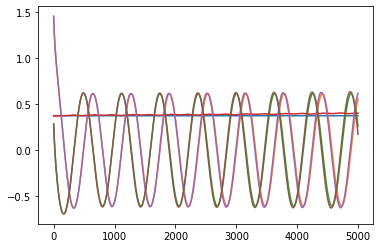

In [13]:
input_forward = 4
dataset = net.DataSet(train_data, val_data, test_data, dt, step_size, n_forward, input_forward=input_forward)

model_name = 'original_model_D{}_noise{}_{}_input{}.pt'.format(step_size, noise, letter, input_forward)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = torch.load(os.path.join(model_dir, model_name), map_location=device)
model.device = device

steps = 5000
y_preds = model.uni_scale_forecast(dataset.test_x, steps)
idx = 0
plt.plot(test_data[idx,:steps])
plt.plot(y_preds[idx])
# plt.plot(np.arange(0,steps,64), y_preds[idx,::64, 0], '.')
# plt.plot(np.arange(0,steps,64), y_preds[idx,::64, 1], '.')


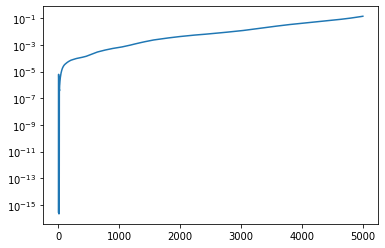

In [7]:
mse = ((y_preds - test_data[:,:steps,:])**2).mean(axis = (0,2))
plt.semilogy(mse)

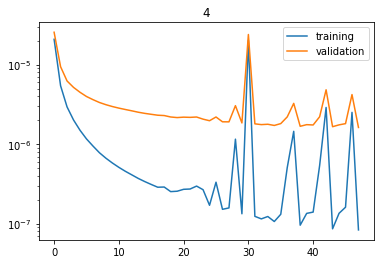

In [8]:
model.plot_loss()

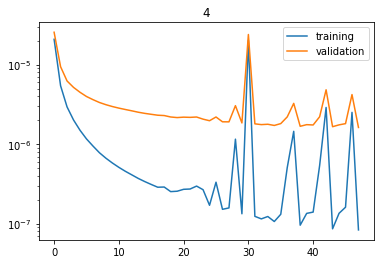

In [9]:
model.plot_loss()

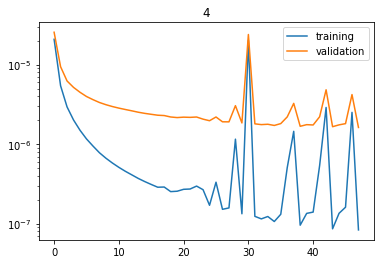

In [10]:
model.plot_loss()

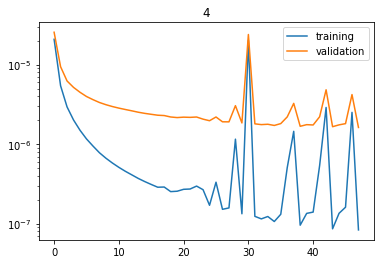

In [11]:
model.plot_loss()

self.train_x =  torch.Size([3200, 1, 3])
self.train_ys =  torch.Size([3200, 4, 3])
self.val_x =  torch.Size([320, 1, 3])
self.test_x =  torch.Size([320, 1, 3])
preds shape =  (320, 3, 1251)
steps shape =  1251
self.train_x =  torch.Size([3200, 2, 3])
self.train_ys =  torch.Size([3200, 4, 3])
self.val_x =  torch.Size([320, 2, 3])
self.test_x =  torch.Size([320, 2, 3])
preds shape =  (320, 3, 1251)
steps shape =  1251
self.train_x =  torch.Size([3200, 3, 3])
self.train_ys =  torch.Size([3200, 4, 3])
self.val_x =  torch.Size([320, 3, 3])
self.test_x =  torch.Size([320, 3, 3])
preds shape =  (320, 3, 1251)
steps shape =  1251
self.train_x =  torch.Size([3200, 4, 3])
self.train_ys =  torch.Size([3200, 4, 3])
self.val_x =  torch.Size([320, 4, 3])
self.test_x =  torch.Size([320, 4, 3])
preds shape =  (320, 3, 1251)
steps shape =  1251
self.train_x =  torch.Size([3200, 8, 3])
self.train_ys =  torch.Size([3200, 4, 3])
self.val_x =  torch.Size([320, 8, 3])
self.test_x =  torch.Size([320, 8, 3])


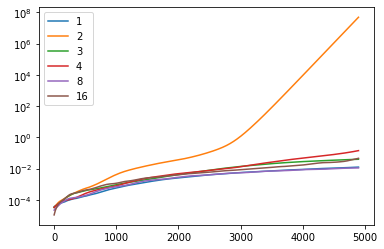

In [15]:
for input_forward in [1, 2, 3, 4, 8, 16]:
    dataset = net.DataSet(train_data, val_data, test_data, dt, step_size, n_forward, input_forward=input_forward)

    model_name = 'original_model_D{}_noise{}_{}_input{}.pt'.format(step_size, noise, letter, input_forward)
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model = torch.load(os.path.join(model_dir, model_name), map_location=device)
    model.device = device

    steps = 5000
    y_preds = model.uni_scale_forecast(dataset.test_x, steps)
#     idx = 0
#     plt.plot(test_data[idx,:steps])
#     plt.plot(y_preds[idx])

    mse = ((y_preds - test_data[:,:steps,:])**2).mean(axis = (0,2))
    plt.semilogy(mse[100:], label = str(input_forward))
plt.legend()
plt.show()
# plt.plot(np.arange(0,steps,64), y_preds[idx,::64, 0], '.')
# plt.plot(np.arange(0,steps,64), y_preds[idx,::64, 1], '.')
